# Imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import seaborn as sns

In [51]:
df = pd.read_csv('Pokemon.csv')
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Indentificando valores nulos/NaN

In [ ]:
df['Type 2'].isnull().sum()

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

Os dados que não possuem entrada se referem aos pokemons únicamente tipados.

### Entendendo relações

Com o dataset analisado, podemos começar a gerar insights sobre o mesmo.

$$
    H0: Fd = Fu
$$

Aqui estamos tentando analisar se a força(Attack) dos pokemons duplamente tipados é superior aos unicamente tipados, utilizando o Teste t de Student para tal.

In [ ]:
Fduplamente_tipados = df[df["Type 2"].notnull()]['Attack']
Funicamente_tipados = df[df["Type 2"].isnull()]['Attack']

alpha = 0.05 #Margem de erro para 95% de certeza
#Verificação pelo teste de levene para saber se as
#variâncias são iguais,então alterando o 
#param 'equal_var' do ttest de acordo

pForça = True
if sts.levene(Fduplamente_tipados,Funicamente_tipados).pvalue > alpha:
    pForça = False

if sts.ttest_ind(Fduplamente_tipados,Funicamente_tipados,equal_var=pForça).pvalue < alpha:
    print('Podemos inferir estatísticamente que nossa hipotese original é falsa.')
else:
    print('Nossa hipotese original é verdadeira, portanto não há diferença significativa entre a força de ataque.')    





True
Podemos inferir estatísticamente que nossa hipotese original é falsa.


Então, se a H0 é falsa, vamos entender qual o comportamento da força entre os tipos.
A força dos duplamente tipados é maior?
$$
H1: Fd > Fu
$$

In [ ]:
alpha = 0.05
ForcaFinal = sts.ttest_ind(Fduplamente_tipados,Funicamente_tipados,equal_var=pForça,alternative='greater').pvalue
if ForcaFinal < alpha:
    print("H1 é verdadeira, logo a força de ataque dos duplamente tipados é maior")
else:
    print("H1 é falsa, então a força dos duplamente tipados é menor que a força dos unicamente tipados")

7.870697833082198e-05
H1 é verdadeira, logo a força de ataque dos duplamente tipados é maior


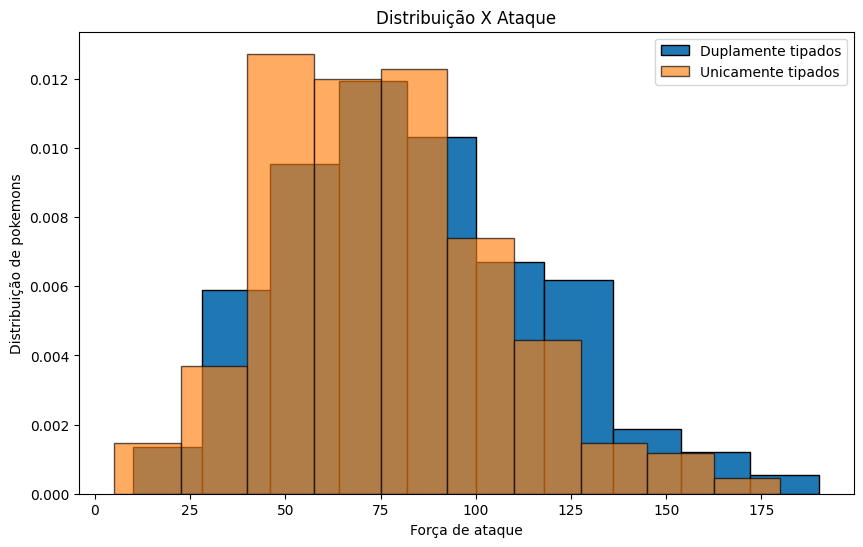

In [96]:
plt.figure(figsize=(10,6))
plt.hist(x = Fduplamente_tipados, edgecolor = 'black',density = True,label='Duplamente tipados')
plt.hist(x = Funicamente_tipados, edgecolor = 'black',density = True,alpha = 0.65,label='Unicamente tipados')
plt.xlabel("Força de ataque")
plt.ylabel("Distribuição de pokemons")
plt.title("Distribuição X Ataque")
plt.legend()
plt.show()